<a href="https://colab.research.google.com/github/rahulkumar1502/ERA-V2/blob/main/Assignment-5/ERA_V2_S5_Rahul_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
sys.path.append('/content')

In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
from model import Net,Net2
from utils import *

In [ ]:
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 19955693.24it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 622888.89it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5569709.35it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3425122.04it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [ ]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

512
512


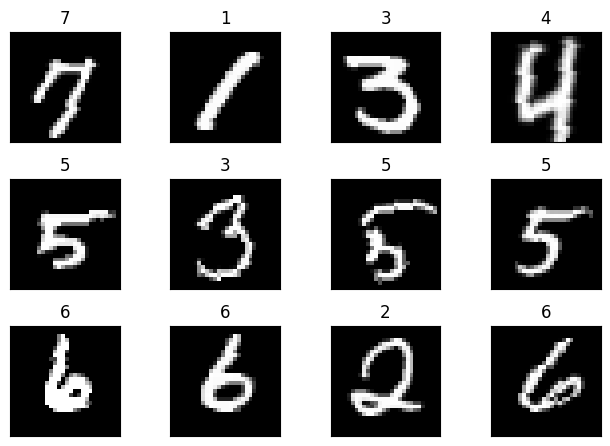

In [ ]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))
print(len(batch_data))
print(len(batch_label))
fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [ ]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []
test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test_acc, test_losses = test(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.4245 Batch_id=117 Accuracy=55.46: 100%|██████████| 118/118 [06:23<00:00,  3.25s/it]


Test set: Average loss: 0.2180, Accuracy: 9342/10000 (93.42%)

Epoch 2


Train: Loss=0.0830 Batch_id=117 Accuracy=94.23: 100%|██████████| 118/118 [06:19<00:00,  3.22s/it]


Test set: Average loss: 0.0828, Accuracy: 9727/10000 (97.27%)

Epoch 3


Train: Loss=0.0584 Batch_id=117 Accuracy=96.39: 100%|██████████| 118/118 [06:28<00:00,  3.29s/it]


Test set: Average loss: 0.0657, Accuracy: 9786/10000 (97.86%)

Epoch 4


Train: Loss=0.1282 Batch_id=117 Accuracy=96.99: 100%|██████████| 118/118 [06:29<00:00,  3.30s/it]


Test set: Average loss: 0.0506, Accuracy: 9841/10000 (98.41%)

Epoch 5


Train: Loss=0.0710 Batch_id=117 Accuracy=97.50: 100%|██████████| 118/118 [06:22<00:00,  3.24s/it]


Test set: Average loss: 0.0492, Accuracy: 9846/10000 (98.46%)

Epoch 6


Train: Loss=0.0952 Batch_id=117 Accuracy=97.83: 100%|██████████| 118/118 [06:18<00:00,  3.21s/it]


Test set: Average loss: 0.0405, Accuracy: 9868/10000 (98.68%)

Epoch 7


Train: Loss=0.0175 Batch_id=117 Accuracy=98.18: 100%|██████████| 118/118 [06:18<00:00,  3.21s/it]


Test set: Average loss: 0.0334, Accuracy: 9892/10000 (98.92%)

Epoch 8


Train: Loss=0.0336 Batch_id=117 Accuracy=98.27: 100%|██████████| 118/118 [06:19<00:00,  3.22s/it]


Test set: Average loss: 0.0330, Accuracy: 9893/10000 (98.93%)

Epoch 9


Train: Loss=0.0274 Batch_id=117 Accuracy=98.38: 100%|██████████| 118/118 [06:16<00:00,  3.19s/it]


Test set: Average loss: 0.0343, Accuracy: 9897/10000 (98.97%)

Epoch 10


Train: Loss=0.0563 Batch_id=117 Accuracy=98.48: 100%|██████████| 118/118 [06:19<00:00,  3.21s/it]


Test set: Average loss: 0.0297, Accuracy: 9905/10000 (99.05%)

Epoch 11


Train: Loss=0.0926 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [06:18<00:00,  3.21s/it]


Test set: Average loss: 0.0289, Accuracy: 9908/10000 (99.08%)

Epoch 12


Train: Loss=0.0251 Batch_id=117 Accuracy=98.69: 100%|██████████| 118/118 [06:17<00:00,  3.20s/it]


Test set: Average loss: 0.0281, Accuracy: 9900/10000 (99.00%)

Epoch 13


Train: Loss=0.0152 Batch_id=117 Accuracy=98.83: 100%|██████████| 118/118 [06:17<00:00,  3.20s/it]


Test set: Average loss: 0.0286, Accuracy: 9887/10000 (98.87%)

Epoch 14


Train: Loss=0.0170 Batch_id=117 Accuracy=98.79: 100%|██████████| 118/118 [06:20<00:00,  3.22s/it]


Test set: Average loss: 0.0277, Accuracy: 9910/10000 (99.10%)

Epoch 15


Train: Loss=0.0376 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [06:19<00:00,  3.21s/it]


Test set: Average loss: 0.0295, Accuracy: 9901/10000 (99.01%)

Epoch 16


Train: Loss=0.0062 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [06:19<00:00,  3.22s/it]


Test set: Average loss: 0.0213, Accuracy: 9924/10000 (99.24%)

Epoch 17


Train: Loss=0.0441 Batch_id=117 Accuracy=99.20: 100%|██████████| 118/118 [06:18<00:00,  3.20s/it]


Test set: Average loss: 0.0217, Accuracy: 9926/10000 (99.26%)

Epoch 18


Train: Loss=0.0024 Batch_id=117 Accuracy=99.17: 100%|██████████| 118/118 [06:18<00:00,  3.21s/it]


Test set: Average loss: 0.0208, Accuracy: 9924/10000 (99.24%)

Epoch 19


Train: Loss=0.0320 Batch_id=117 Accuracy=99.18: 100%|██████████| 118/118 [06:19<00:00,  3.21s/it]


Test set: Average loss: 0.0210, Accuracy: 9922/10000 (99.22%)

Epoch 20


Train: Loss=0.0260 Batch_id=117 Accuracy=99.21: 100%|██████████| 118/118 [06:18<00:00,  3.21s/it]


Test set: Average loss: 0.0206, Accuracy: 9924/10000 (99.24%)



Text(0.5, 1.0, 'Test Accuracy')

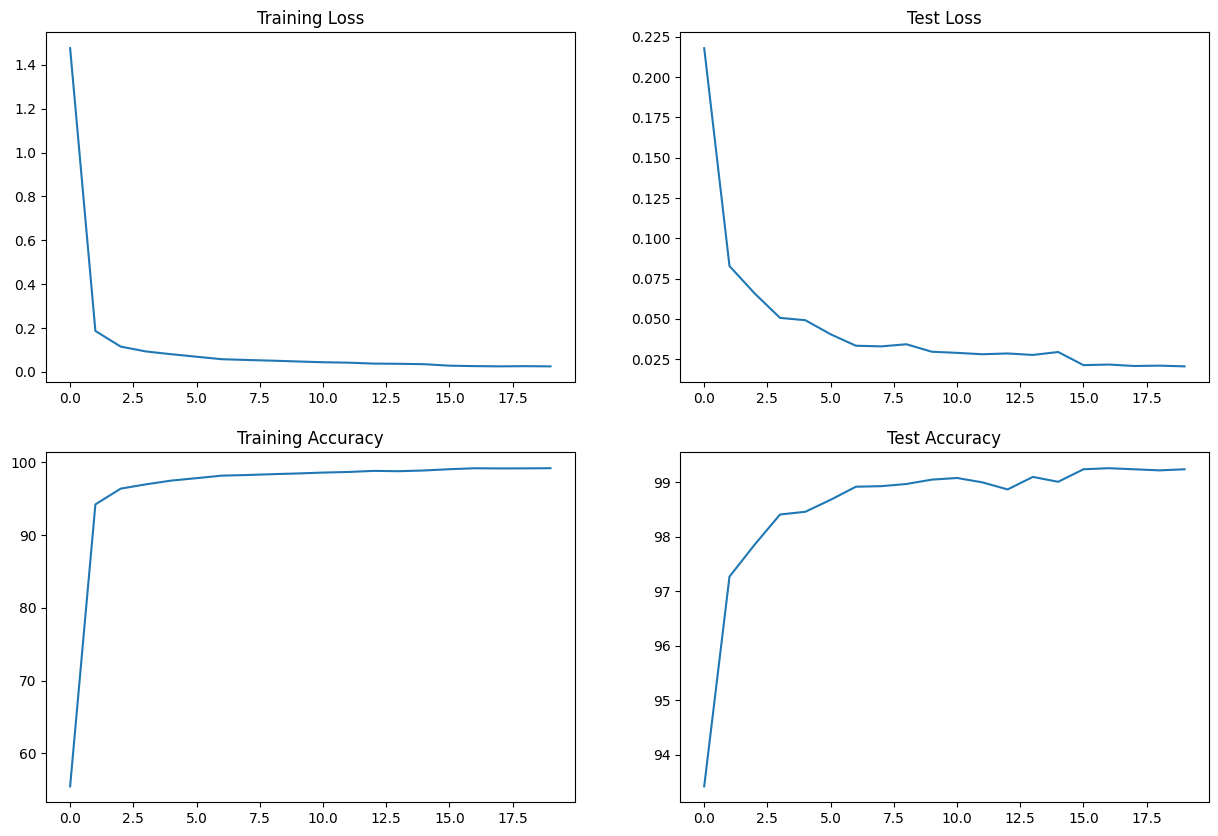

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")